In [2]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
import lightgbm as lgb

#Common Model Helpers
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

pd.set_option('display.max_columns', 100)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import gc
gc.enable() 

Python version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.3
matplotlib version: 3.1.1
NumPy version: 1.17.4
SciPy version: 1.3.1
IPython version: 7.9.0
scikit-learn version: 0.21.3
-------------------------


In [3]:
import codecs
with codecs.open("train.csv", "r", "Shift-JIS", "ignore") as file:
    df1 = pd.read_csv(file)

with codecs.open("valid.csv", "r", "UTF-8", "ignore") as file:
    df2 = pd.read_csv(file)
# train = pd.read_csv('train.csv','utf-8')
# test  = pd.read_csv('valid.csv','utf-8')


train = df1
test_x = df2

train_x = train.drop(['１２ヶ月事故'], axis=1)
train_y = train['１２ヶ月事故']
print(train_y.shape)
# 説明用に学習データとテストデータの元の状態を保存しておく
train_x_saved = train_x.copy()
test_x_saved = test_x.copy()
print(train.shape)

# 学習データとテストデータを返す関数
def load_data():
    train_x, test_x = train_x_saved.copy(), test_x_saved.copy()
    return train_x, test_x

(16641,)
(16641, 39)


In [5]:
train_x, test_x = load_data()

# JIS住所コード→都道府県コードに変換
# train_x['ＪＩＳ住所コード'] = train_x['ＪＩＳ住所コード'].apply(lambda code: str(code)[:2] if code > 9999 else "0{}".format(code)[:2])
train_x['ＪＩＳ住所コード'] = train_x['ＪＩＳ住所コード'].apply(lambda code: float(code / 1000))

drop_cols = ['NO',
             '申込年月日',
             '申込時間',
             '生年月日',
             '事業所有無',
             '新規時自動契約機店番',
             '新職種区分',
             '【新職種区分】詳細項目',
             '【媒体コード】大項目',
             '【媒体コード】詳細項目', 
             '所得証明区分',
             '扶養家族数',
             '貸付年月日',
#              追加する
             '住居区分',
             '独身内訳',
             '就業形態区分',
             '同居区分',
             '性別',
            ]
train_x = train_x.drop(drop_cols, axis=1)

change_cols = {
    '申込年月日': 'Application date',
    '申込時間': 'Application time',
    '事業所有無': 'have office',    
    '生年月日': 'birthday',
    '事業所有無': 'zigyosyo umu',
    '新規時自動契約機店番': 'sinkizi zidoukeiyaku',
    '【媒体コード】大項目': 'baitai big',
    '【媒体コード】詳細項目': 'baitai detail',
    '所得証明区分': 'syotoku syoumei',
    '扶養家族数': 'huyou kazoku',
    '貸付年月日' : 'taihu nenn gappi',   
    '受付時間帯区分': 'Recieve period classification',
    '受付形態区分': 'Recieve pattern classification',
    '取扱店番': 'Store id',
    '管理店番': 'Management store id',
    '性別': 'Sex',
    '年齢': 'Age',
    'ＪＩＳ住所コード': 'JIS code',
    '独既区分': 'marriage',
    '新職種区分': 'job classification',
    '【新職種区分】大項目': 'job classification (big)',
    '【新職種区分】詳細項目': 'job classification (detail)',
    '雇用形態区分': 'Employment type classification',
    '就業形態区分': 'Work type classification',
    '会社規模区分': 'Company size classification',
    '合計年収': 'Total income',
    '在社月数': 'Number of months in office',
    '住居区分': 'Residential division',
    '居住月数': 'Months of residence',
    '家賃負担額': 'Rent burden',
    '家族構成区分': 'family structure',
    '保険職種区分': 'Insurance occupation classification',
    '収入証明有無': 'Proof of income',
    '独身内訳': 'Single',
    '同居区分': 'Living together',
    '扶養家族子供数': 'Dependent children',
    '名義区分': 'Name classification',
    '事業形態区分': 'Business type classification'               
}
train_x = train_x.rename(columns = change_cols)

# # 申込時間を変換(HH:MM:SS → HH)
# train_x['Application time'] = train_x['Application time'].apply(lambda time: int(time / 10000))
# # 申込年月日を変換
# train_x['Application month'] = pd.to_datetime(train_x['Application date']).apply(lambda date: date.month)
# train_x['Application day'] = pd.to_datetime(train_x['Application date']).apply(lambda date: date.day)
# train_x = train_x.drop('Application date', axis=1)

train_x['rent ratio'] = (train_x['Rent burden'] * 12) / train_x['Total income']


 
# train_x['Total income'] = np.log1p(train_x['Total income']) #対数変換

# testも同じように前処理
test_x['ＪＩＳ住所コード'] = train['ＪＩＳ住所コード'].apply(lambda code: float(code / 1000))
drop_cols.remove('NO')
test_x = test_x.drop(drop_cols, axis=1)
test_x = test_x.rename(columns = change_cols)


test_x['rent ratio'] = (test_x['Rent burden'] * 12) / test_x['Total income']
# test_x['Total income'] = np.log1p(test_x['Total income']) # 対数変換

#  # 申込時間を変換(HH:MM:SS → HH)
# test_x['Application time'] = test_x['Application time'].apply(lambda time: int(time / 10000))
# # 申込年月日を変換
# test_x['Application month'] = pd.to_datetime(test_x['Application date']).apply(lambda date: date.month)
# test_x['Application day'] = pd.to_datetime(test_x['Application date']).apply(lambda date: date.day)
# test_x = test_x.drop('Application date', axis=1)

In [6]:
# Create Folds
folds = KFold(n_splits=5, shuffle=True, random_state=546789)

def train_model(data_, test_, y_, folds_):
    oof_preds = np.zeros(data_.shape[0])
    sub_preds = np.zeros(test_.shape[0])
    
    feature_importance_df = pd.DataFrame()
    
    feats = [f for f in data_.columns]
    
    for n_fold, (trn_idx, val_idx) in enumerate(folds_.split(data_)):
        trn_x, trn_y = data_[feats].iloc[trn_idx], y_.iloc[trn_idx]
        val_x, val_y = data_[feats].iloc[val_idx], y_.iloc[val_idx]
        
        clf =  XGBClassifier(
                    learning_rate =0.01,
                    n_estimators=4000,
                    max_depth=7,
                    min_child_weight=10,
                    gamma=0,
                    subsample=0.9,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=6,
                    scale_pos_weight=1,
                    seed=27
                 )
        
        clf.fit(trn_x, trn_y, 
                eval_set= [(trn_x, trn_y), (val_x, val_y)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100  # aucを目的関数, 
               )
        
        oof_preds[val_idx] = clf.predict_proba(val_x)[:, 1]
        sub_preds += clf.predict_proba(test_[feats])[:, 1] / folds_.n_splits
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        
        print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
        del clf, trn_x, trn_y, val_x, val_y
        gc.collect()
        
    print('Full AUC score %.6f' % roc_auc_score(y_, oof_preds)) 
    
    test_['TARGET'] = sub_preds
    
    return oof_preds, test_[['TARGET']], feature_importance_df
# Train model and get oof and test predictions
oof_preds, test_preds, importances = train_model(train_x, test_x, train_y, folds)


[0]	validation_0-auc:0.707982	validation_1-auc:0.643644
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.815658	validation_1-auc:0.699095
[200]	validation_0-auc:0.835251	validation_1-auc:0.702316
[300]	validation_0-auc:0.849991	validation_1-auc:0.704024
[400]	validation_0-auc:0.862643	validation_1-auc:0.70406
Stopping. Best iteration:
[339]	validation_0-auc:0.854942	validation_1-auc:0.70448

Fold  1 AUC : 0.704480
[0]	validation_0-auc:0.697695	validation_1-auc:0.635933
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.814035	validation_1-auc:0.721687
[200]	validation_0-auc:0.833996	validation_1-auc:0.725206
[300]	validation_0-auc:0.848005	validation_1-auc:0.727938
[400]	validation_0-auc:0.86158	validation_1-auc:0.728876
[50

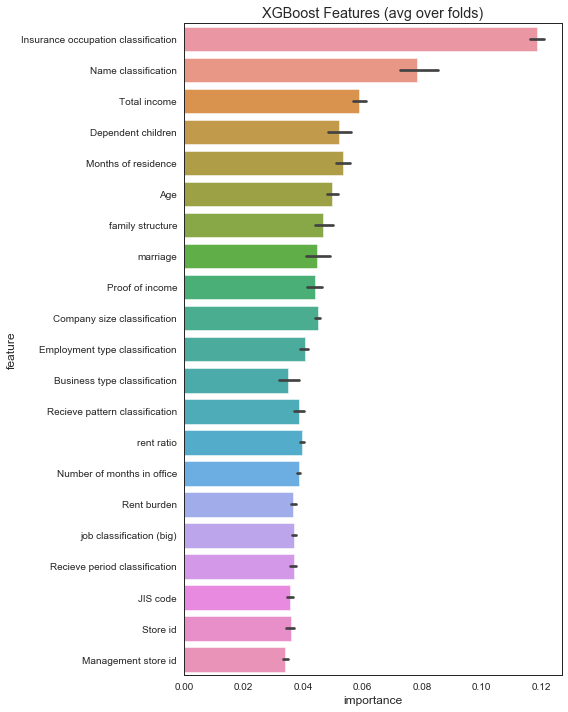

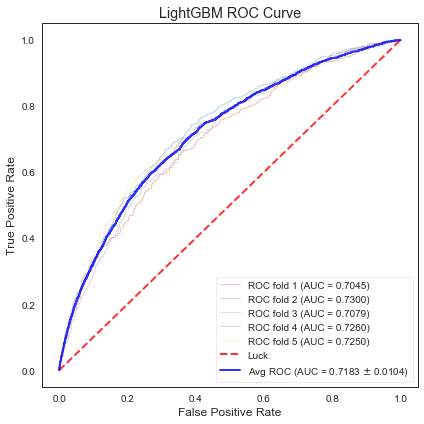

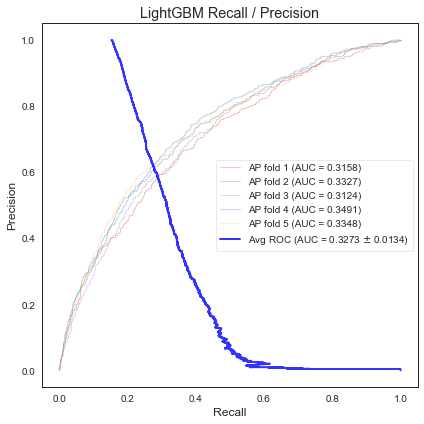

In [7]:
def display_importances(feature_importance_df_):
    # Plot feature importances
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(
        by="importance", ascending=False)[:50].index
    
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    
    plt.figure(figsize=(8,10))
    sns.barplot(x="importance", y="feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title('XGBoost Features (avg over folds)')
    plt.tight_layout()
#     plt.savefig('lgbm_importances.png')


def display_roc_curve(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = roc_auc_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    fpr, tpr, thresholds = roc_curve(y_, oof_preds_)
    score = roc_auc_score(y_, oof_preds_)
    plt.plot(fpr, tpr, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LightGBM ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    
#     plt.savefig('roc_curve.png')


def display_precision_recall(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = average_precision_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='AP fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    precision, recall, thresholds = precision_recall_curve(y_, oof_preds_)
    score = average_precision_score(y_, oof_preds_)
    plt.plot(precision, recall, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('LightGBM Recall / Precision')
    plt.legend(loc="best")
    plt.tight_layout()
    
#     plt.savefig('recall_precision_curve.png')

    
# Display a few graphs
folds_idx = [(trn_idx, val_idx) for trn_idx, val_idx in folds.split(train_x)]
display_importances(feature_importance_df_=importances)
display_roc_curve(y_=train_y, oof_preds_=oof_preds, folds_idx_=folds_idx)
display_precision_recall(y_=train_y, oof_preds_=oof_preds, folds_idx_=folds_idx)

# Save test predictions
oof_preds = pd.Series(oof_preds)
oof_preds.to_csv('train_output1.csv', index=False)
test_preds.to_csv('valid-output1.csv', index=False)